In [42]:
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.cluster import Birch, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

apcroot = "./apcdata/APCData/"

# Corrosion Data
df3 = pd.read_csv(apcroot + "APC_3_3_21/APC_3_3_21_HitDriven.TXT",  delim_whitespace=True)
df4 = pd.read_csv(apcroot + "APC_3_4_21/APC_3_4_21_HitDriven.TXT",  delim_whitespace=True)
df8 = pd.read_csv(apcroot + "APC_3_8_21/APC_3_8_21_HitDriven.TXT",  delim_whitespace=True)
df9 = pd.read_csv(apcroot + "APC_3_9_21/APC_3_9_21_HitDriven.TXT",  delim_whitespace=True)
df10 = pd.read_csv(apcroot + "APC_3_10_21/APC_3_10_21_HitDriven.TXT",  delim_whitespace=True)
dfcors = [df3, df4, df8, df9, df10]

#Abrasion Data
df15hz = pd.read_csv("./WTA_3_18_21_15Hz_10min_HitDriven.TXT", delim_whitespace=True)
df20hz = pd.read_csv("./WTA_3_18_21_20Hz_10min_HitDriven.TXT", delim_whitespace=True)
df25hz = pd.read_csv("./WTA_3_18_21_25Hz_10min0_HitDriven.TXT", delim_whitespace=True)


dfcor = df3.copy()

for df in dfcors[1:]:
    dfcor = dfcor.append(df)

    
dfs_tun = [df15hz, df20hz, df25hz]
# dfall
# dftunnel = dftunnel[1:3000]


In [43]:
plt.rcParams['figure.figsize'] = [12/2, 8/2]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

def perform_analysis(data, d_name):
    #Calculate Sample Standard Deviation
    N = len(data)
    x_bar = np.average(data)
    S = np.std(data, ddof=1) #Sets divisor to N-ddof or N-1
    S_xbar = S/ np.sqrt(N)
#     print("N", N , d_name)
#     print("x_bar ", x_bar, d_name)
#     print("S ", S, d_name)
#     print("S_xbar", S_xbar, d_name)

    return(N, x_bar, S, S_xbar)


def scatter_by_row_colname(yname, df, title):

    xdata = df.index.values
    ydata = df[yname].to_numpy()

#     xmax = np.max(xdata)
#     ymax = np.max(ydata)
#     xdata = xdata/xmax
#     ydata = ydata/ymax
    fig, ax = plt.subplots(1)
    ax.scatter(xdata, ydata, s=0.5)
    ax.set_xlabel("Index")
    ax.set_ylabel(yname)
    ax.set_title(title)
    plt.show()

def scatter_from_colname(xname, yname, df, title):

    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()

#     xmax = np.max(xdata)
#     ymax = np.max(ydata)
#     xdata = xdata/xmax
#     ydata = ydata/ymax
    fig, ax = plt.subplots(1)
    ax.scatter(xdata, ydata, s=0.5)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_title(title)
    plt.show()
#     plt.savefig("./cluster_plots/" + yname + "_vs_" + xname + ".png")

def scatter_3d(xname, yname,zname, df):
    fig = plt.figure()
    fig.set_size_inches(10,6)
    ax = fig.add_subplot(111, projection='3d')
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    zdata = df[zname].to_numpy()
    ax.scatter(xdata/np.max(xdata), ydata/np.max(ydata), zdata/np.max(zdata), s=0.6)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_zlabel(zname)
    plt.show()
#     plt.savefig("./apcAnalysis/3dslices/" + yname + "_vs_" + xname + "vs" + zname + ".png", dpi=200)
    
def density_plot(xname, yname, df, sz, title):
    xdata = df[xname].to_numpy()
    ydata = df[yname].to_numpy()
    
    fig, ax = plt.subplots(1)
    ax.hist2d(xdata, ydata, (sz, sz), cmap=plt.cm.jet, norm=LogNorm())
    ax.set_xlim((0,900))
    ax.set_xlabel(xname)
    ax.set_title(title)
    ax.set_ylabel(yname)


def density_row_colname(yname, df, sz, title):
    xdata = df.index.values
    ydata = df[yname].to_numpy()
    
    fig, ax = plt.subplots(1)
    ax.hist2d(xdata, ydata, (sz, sz), cmap=plt.cm.jet, norm=LogNorm())
#     ax.set_xlim((0,900))
    ax.set_xlabel("Index")
    ax.set_title(title)
    ax.set_ylabel(yname)



In [44]:
# names = df4.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"])
# print(names)
# count = 0
# dropped_names_1 = []
# dropped_names_2 = []
# for c1 in names:
#     for c2 in names.drop(dropped_names_1):
#         for c3 in names.drop(dropped_names_1):
#             count+= 1
#             scatter_3d(c1, c2, c3, df)
# #             print(c1, c2, c3)
#             dropped_names_2.append(c2)
#         dropped_names_1.append(c1)


# len(df.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"]))

# names = df.columns.drop(["ID", "CH", "THR"])
# count = 0
# dropped_names = []
# for c1 in names:
#     for c2 in names.drop(dropped_names):
#         count+= 1

# density_plot("P-FRQ", "FRQ-C", df4)

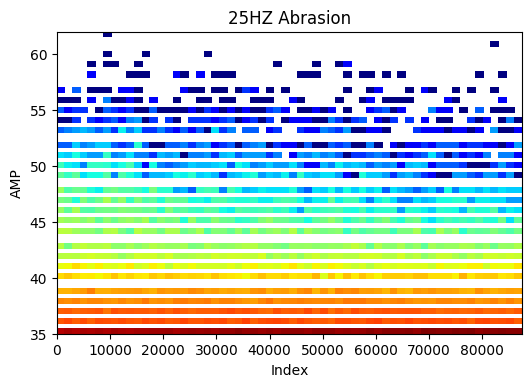

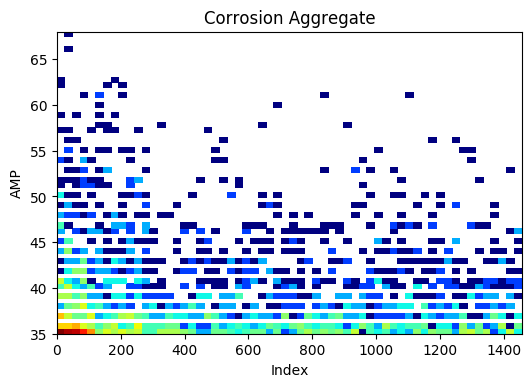

In [45]:
density_row_colname("AMP", df25hz, 60, "25HZ Abrasion")
density_row_colname("AMP", dfcor, 60, "Corrosion Aggregate")
# density_plot("P-FRQ", "FRQ-C", df25hz, 80, "25Hz Abrasion")
# density_plot("P-FRQ", "FRQ-C", df20hz, 80, "20Hz Abrasion")
# density_plot("P-FRQ", "FRQ-C", df15hz, 80, "15Hz Abrasion")
# density_plot("P-FRQ", "FRQ-C", dfcor, 80, "Corrosion Aggregated")
# for idx, df in enumerate(dfs):
#     scatter_3d("SIG-STRNGTH", "P-FRQ", "FRQ-C", df)
# for names in dftt.columns.drop(["ID", "CH", "THR","PCNTS", "COUN"]):
#     scatter_3d("FRQ-C", "P-FRQ", names, dftt)

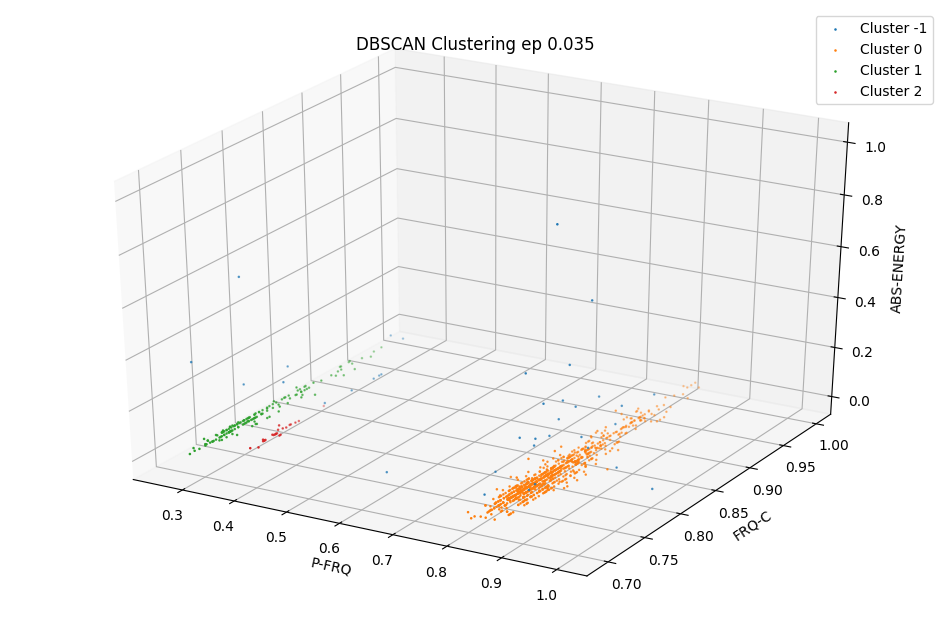

1000 1000


array([-1,  0,  1,  2])

In [46]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

dfCL = df25hz
# model = Birch(threshold=0.001, n_clusters=3)
# fit the model

xname, yname, zname = "P-FRQ", "FRQ-C", "ABS-ENERGY"

useRandom = True
start = 1
end   = 1000
if useRandom:
    xdata = np.random.choice(dfCL[xname].to_numpy(), (end), replace = False)#[start:end]
    ydata = np.random.choice(dfCL[yname].to_numpy(), (end), replace = False)#[start:end]
    zdata = np.random.choice(dfCL[zname].to_numpy(), (end), replace = False)#[start:end]
else:
    xdata = dfCL[xname].to_numpy()
    ydata = dfCL[yname].to_numpy()
    zdata = dfCL[zname].to_numpy()
    
xdata = xdata/np.max(xdata)
ydata = ydata/np.max(ydata)
zdata = zdata/np.max(zdata)
X = np.column_stack((xdata, ydata, zdata))

epsilon = 0.035
model = DBSCAN(eps=epsilon, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
i = 0
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
#     print(X[row_ix, 0])
    ax.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2], s=0.7, label=f"Cluster {cluster}")
    
# Set Labels and Legends
ax.set_xlabel(xname)
# ax.set_xlim((-10, 500))
# ax.set_ylim((150, 800))
ax.legend()
ax.set_ylabel(yname)
ax.set_zlabel(zname)
ax.set_title(f"DBSCAN Clustering ep {epsilon}")
# show the plot
plt.show()

print(len(yhat), len(X))

clusters


In [22]:
#Separate clusters and export hit counts
# for cid in clusters:
#     rows = np.where(yhat == cid)

#     # df_hits = df.filter(items=list(row_ix_g2), axis=0)
#     df_hits = df.loc[rows]

#     df_hits["Hit Count"].values

#     with open(f"cluster{cid}.txt", "w") as f:
#         for idx in df_hits["Hit Count"].values:
#             f.write(f"{idx}\n")

In [77]:
def radar_plot(df_radar, title):
    labels = df_radar.columns.drop(["ID", "CH", "THR","PCNTS", "COUN", "SSSSSSSS.mmmuuun", "SIG-STRNGTH", "RISE", "I-FRQ", "DURATION"])
    ax = plt.subplot(111, projection="polar")

    datatuples = []
    for label in labels:
        series = df_radar[label].values
        atuple = perform_analysis(series, label)
        datatuples.append(atuple)

    means = [tup[1] for tup in datatuples]
    N = len(means)
    means += means[:1]

    stds = [tup[2] for tup in datatuples]
    stds += stds[:1]

    angles = [n / float(N) * 2* np.pi for n in range(N)]
    # print(angles[-1])
    angles += angles[:1]

    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
#     ax.set_rticks([-700,,0.75,1])
    ax.set_title(title)
    ax.set_rlabel_position(-10)
    ax.set_rlim((-700,800))
    # ax.set_xlabel_position(-5)
    # ax.grid(True)
    ax.plot(angles, means)
    ax.fill_between(angles, np.add(means, stds), np.subtract(means, stds), color="red", alpha=0.2)

    plt.show()

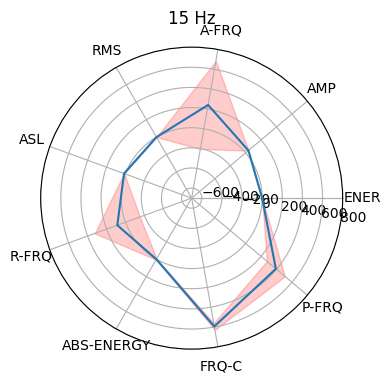

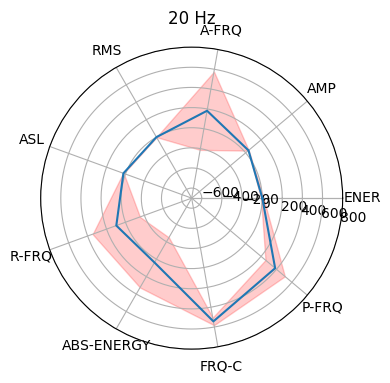

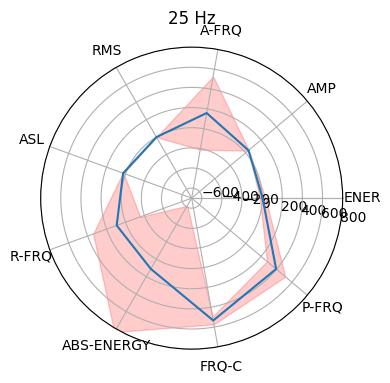

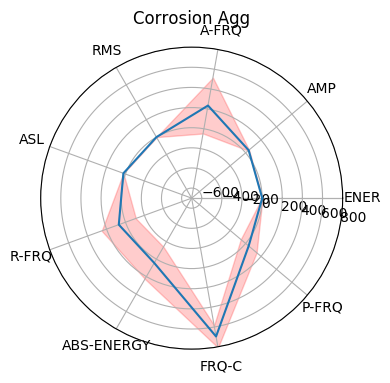

In [78]:
titles = ["15 Hz", "20 Hz", "25 Hz"]
for title, df in zip(titles, dfs_tun):
    radar_plot(df, title)
    
radar_plot(dfcor, "Corrosion Agg")